<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری سوم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: پوریا جمیع  
</h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:yellow">
میتوانید در صورت نیاز بلوک جدیدی برای هر بخش اضافه کنید تا کد خوانا تر شود.
</p>
</div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
خواندن کتابخانه ها
</h3>
</div>

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دریافت مجموعه داده
</h3>
</div>

In [218]:
# load data
train_path = 'Adult_TrainDataset.csv'
test_path = 'Adult_TestDataset.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
تحلیل و بررسی داده
</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مجموعه داده را با روش های مختلف از جمله رسم پلات های مختلف بررسی کنید تا یک شهود کلی نسبت به آن داشته باشید.
</p>

</div>

Class Distribution:

برای اینکه ببینیم چه درصدی از جامعه چه درامدی  دارند.‍

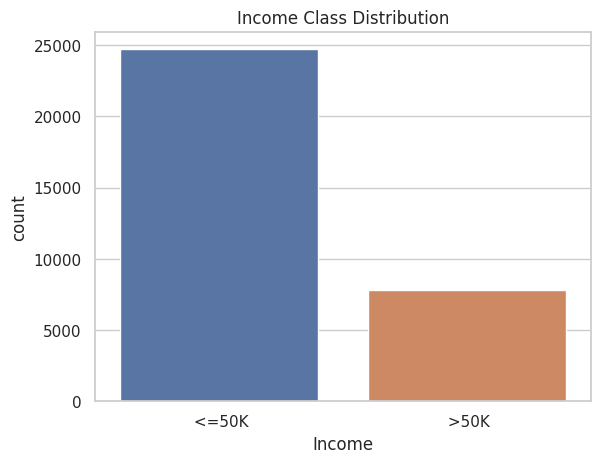

In [219]:
sns.countplot(x='Income', data=train_df)
plt.title('Income Class Distribution')
plt.show()


Numerical Features Summary:


In [220]:
numerical_summary = train_df.describe()
print(numerical_summary)


                Age  Final_Weight  Education-Number  Capital_Gain  \
count  32561.000000  3.256100e+04      32561.000000  32561.000000   
mean      38.581647  1.897784e+05         10.080679   1077.648844   
std       13.640433  1.055500e+05          2.572720   7385.292085   
min       17.000000  1.228500e+04          1.000000      0.000000   
25%       28.000000  1.178270e+05          9.000000      0.000000   
50%       37.000000  1.783560e+05         10.000000      0.000000   
75%       48.000000  2.370510e+05         12.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital_Loss  Hours-Per-Week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  



---


histograms:

ویژگی‌های عددی را با هیستوگرام پلات می‌کنیم تا ارتباط و نوع پخش شدگی داده‌ها را مشاهده کنیم.

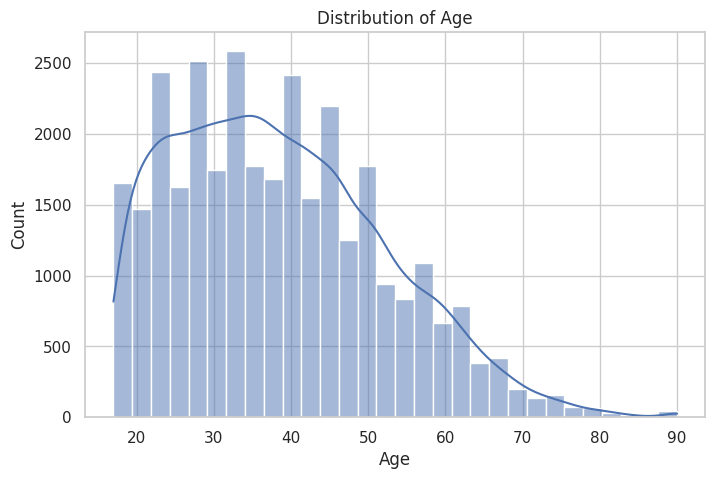

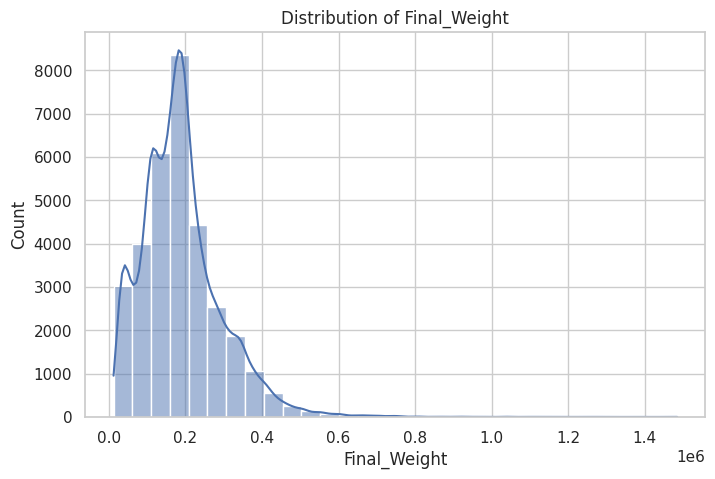

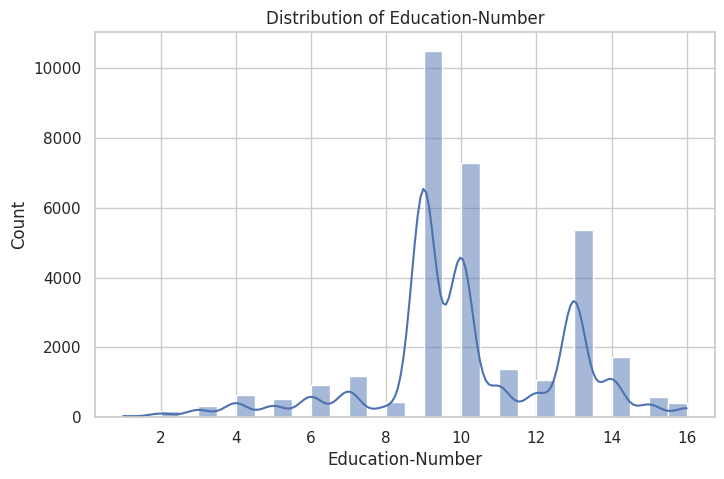

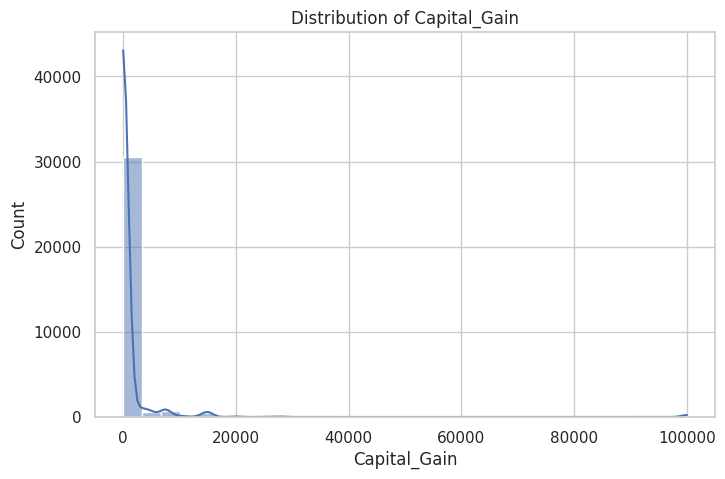

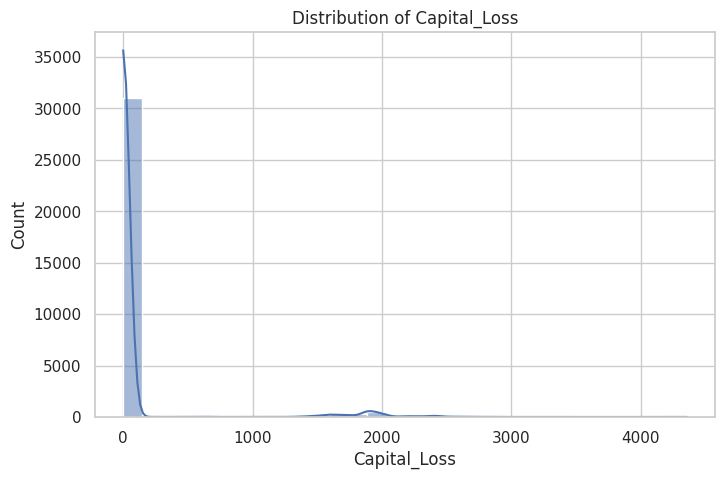

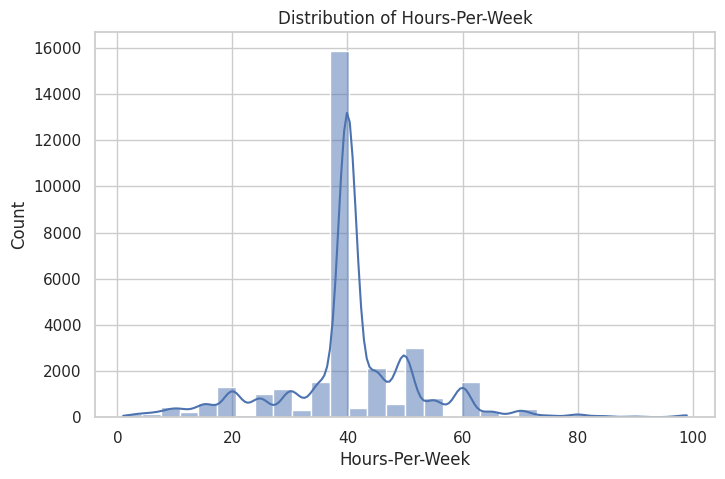

In [221]:
# Plot histograms for numerical features
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


bar charts for categorical distribution:

برای اینکه ببینیم وضعیت درامدها نسبت به گروه‌های مختلف انسانی چه پخش‌شدگی‌ای دارند.

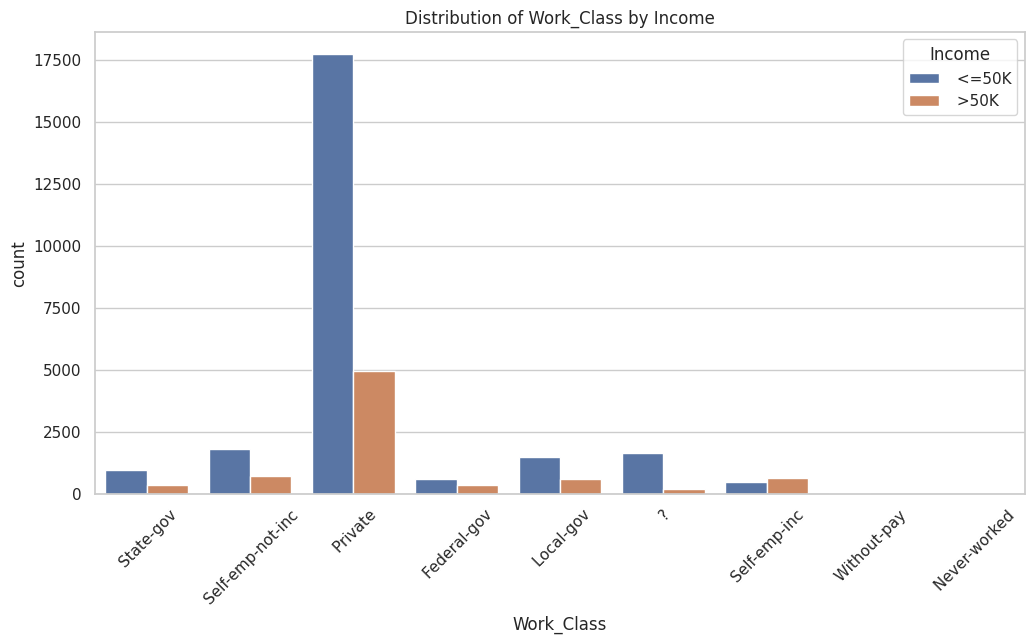

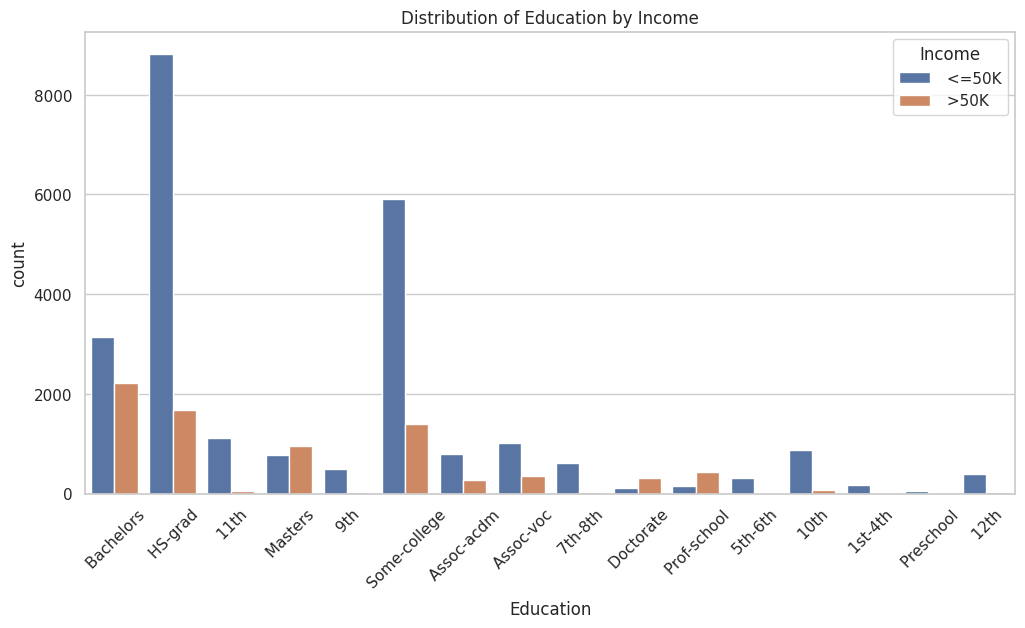

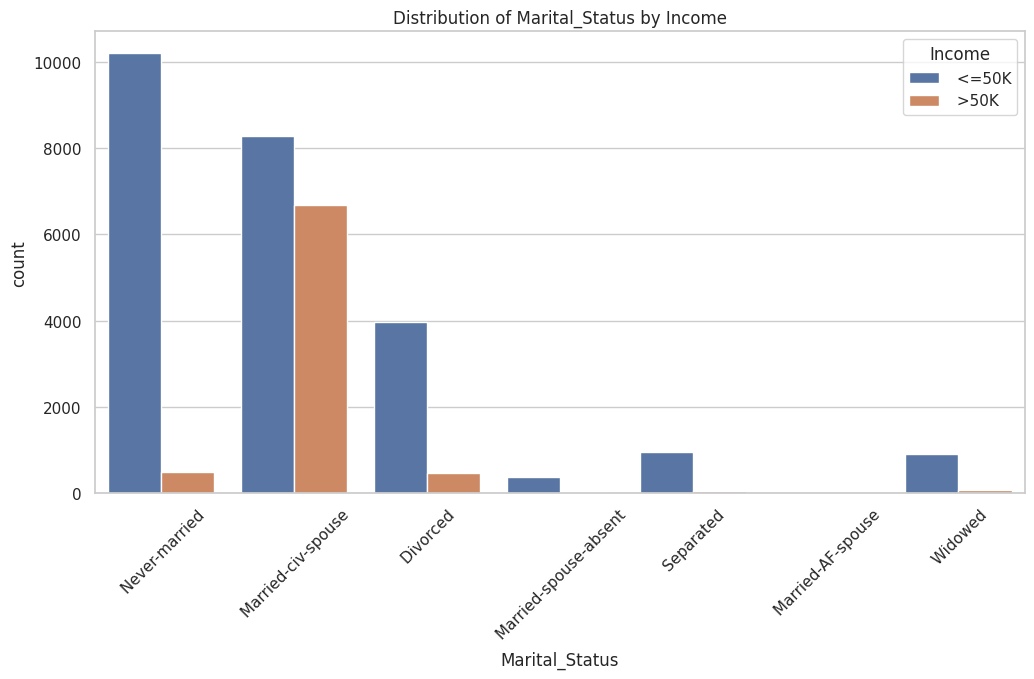

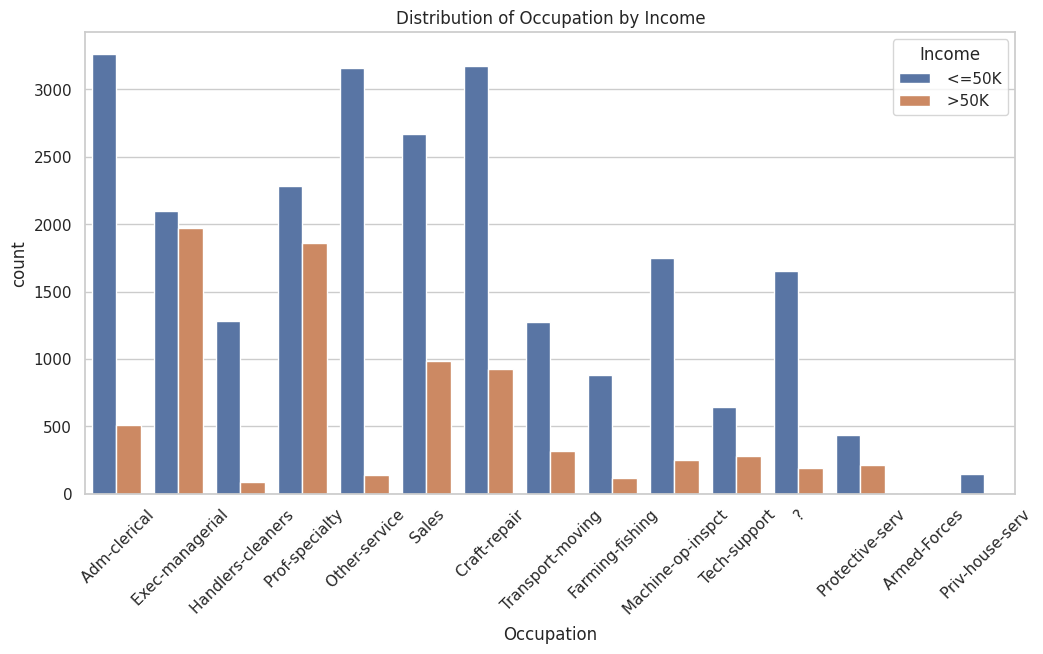

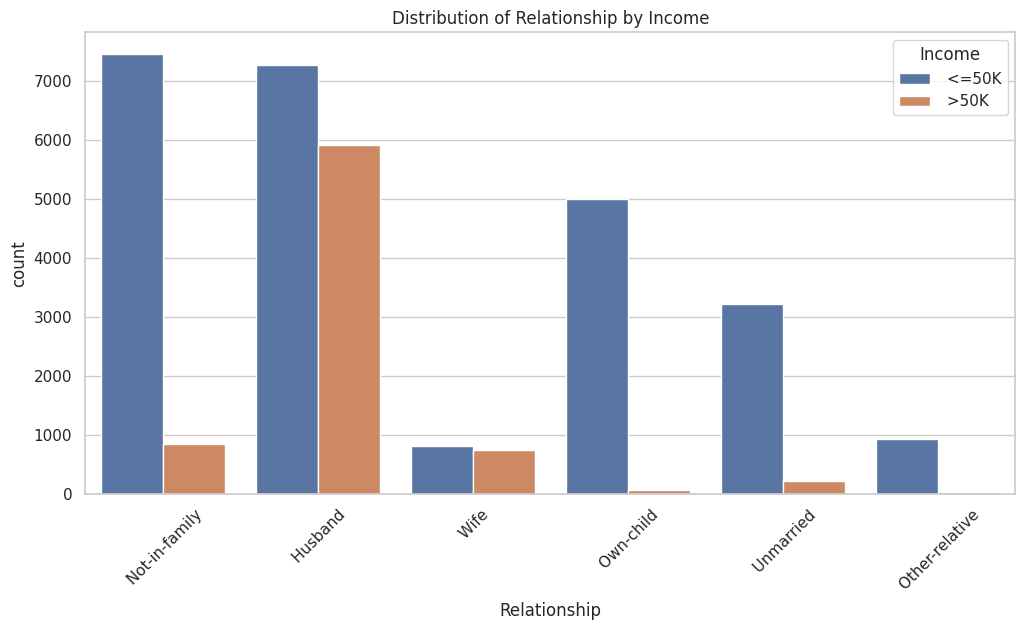

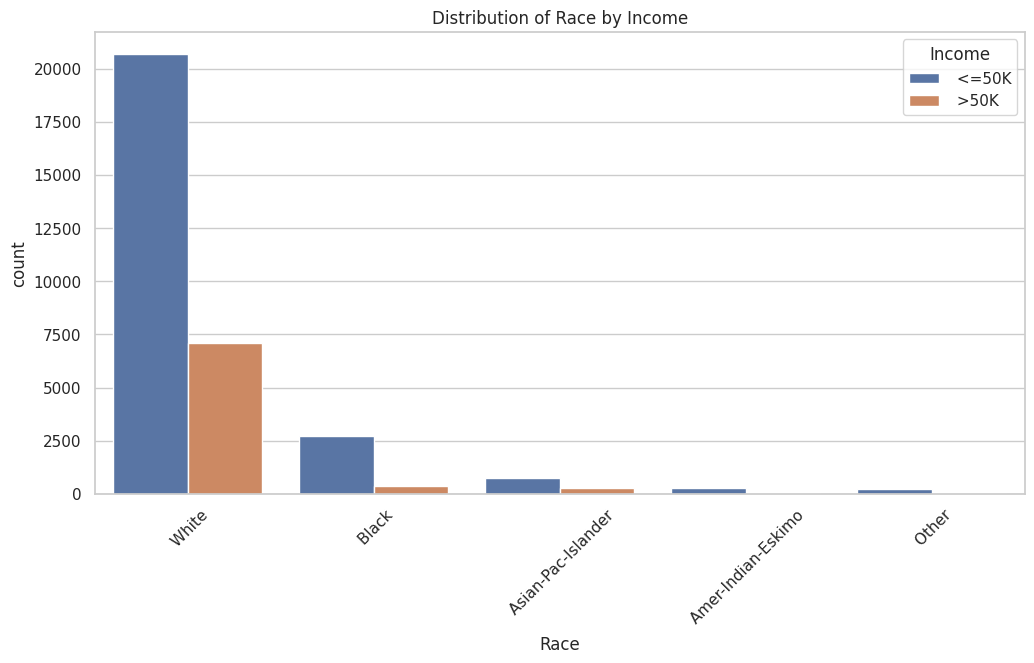

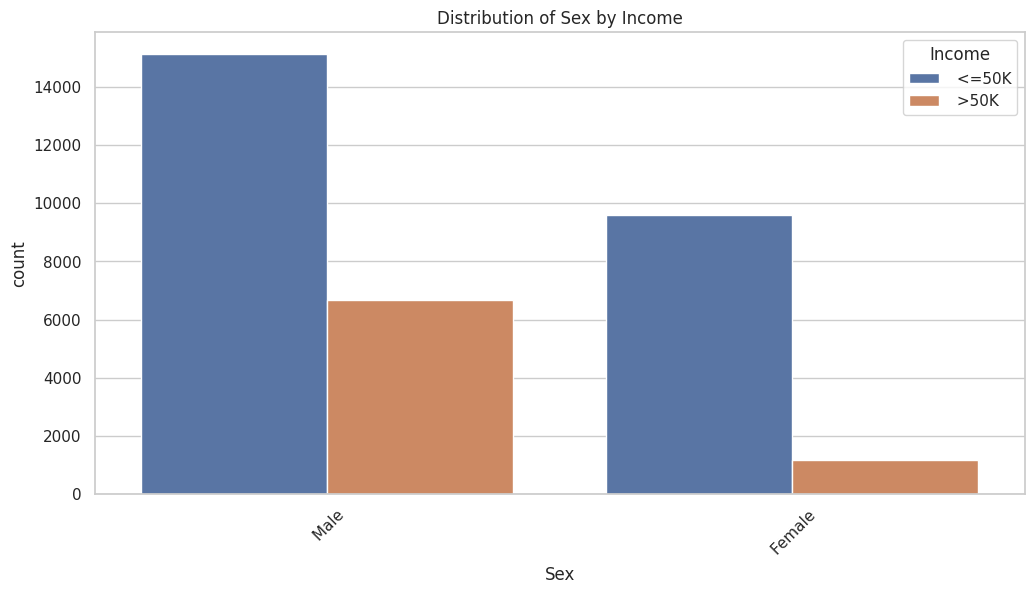

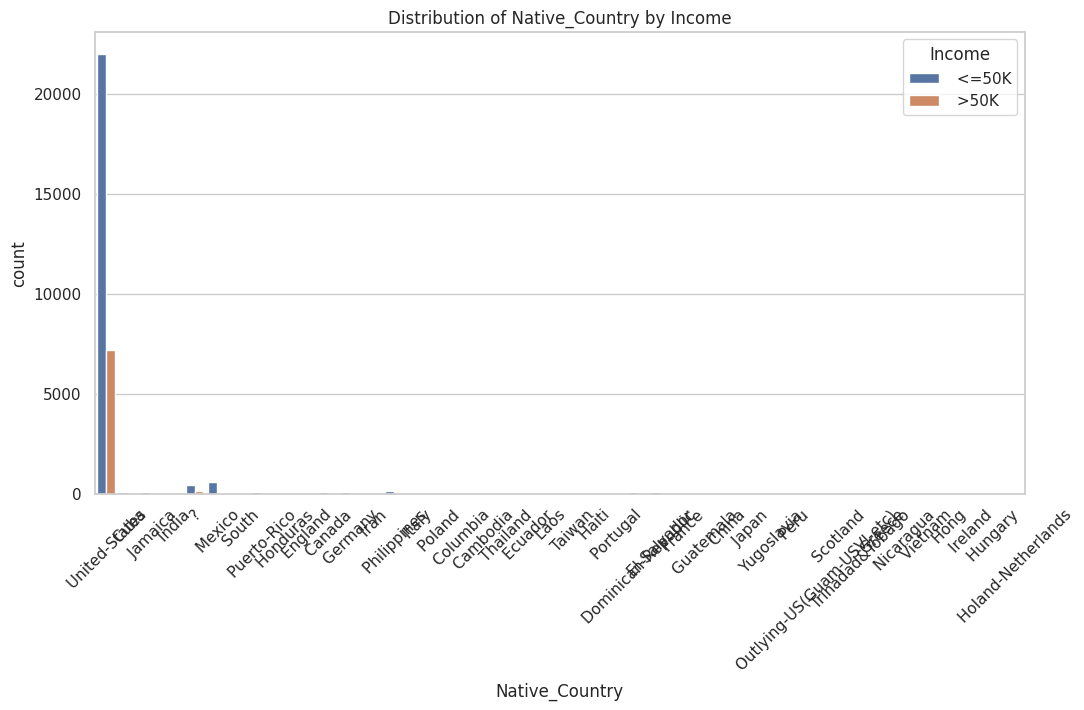

In [222]:
# Plot bar charts for categorical features
for feature in cat_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Income', data=train_df)
    plt.title(f'Distribution of {feature} by Income')
    plt.xticks(rotation=45)
    plt.show()


Scatter plot between numerical feature and income:

یک اسکترپلات برای درک ویژگی‌های مختلف و ارتباط آن با درامد رسم میکنیم.

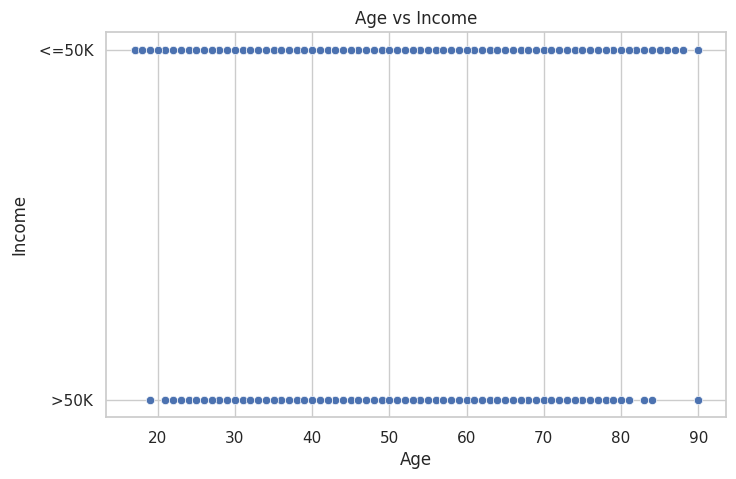

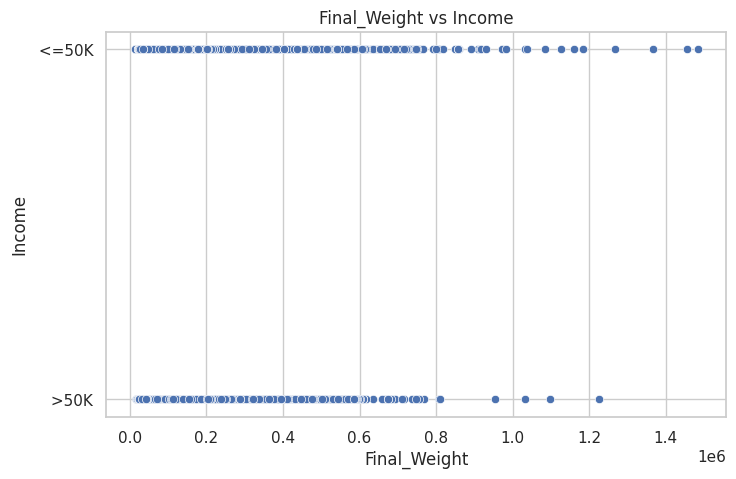

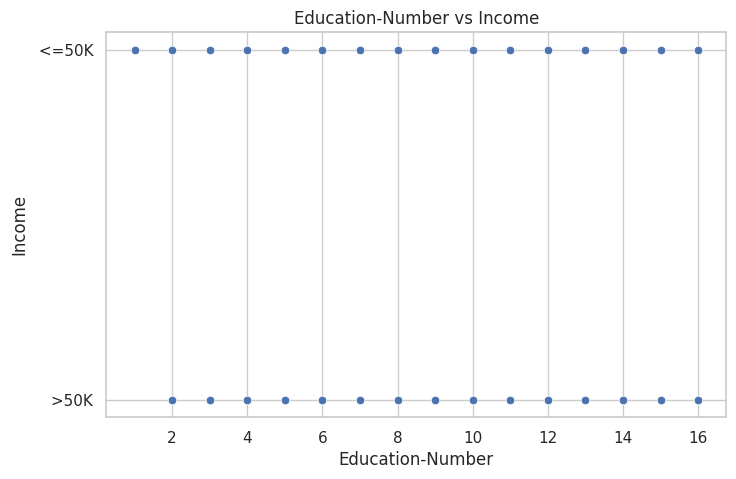

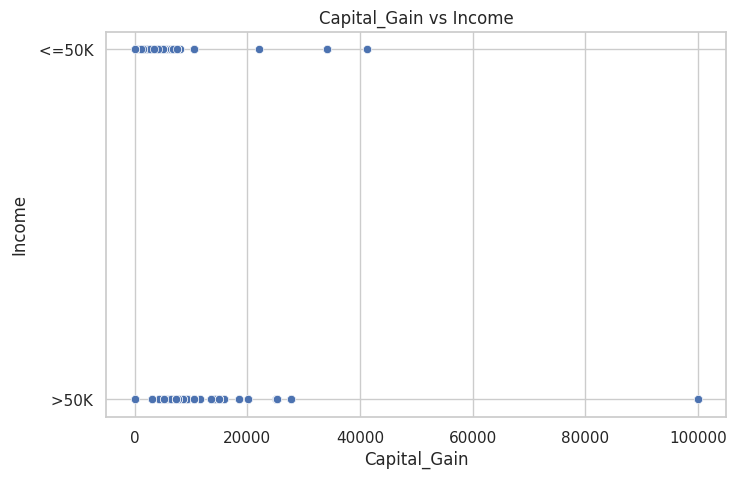

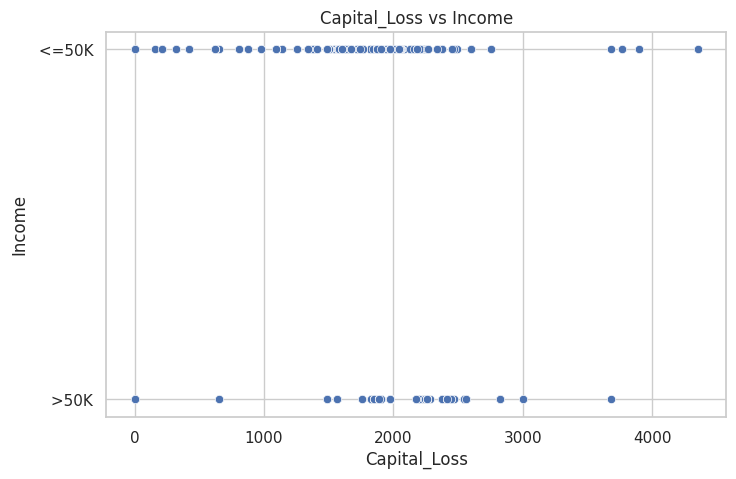

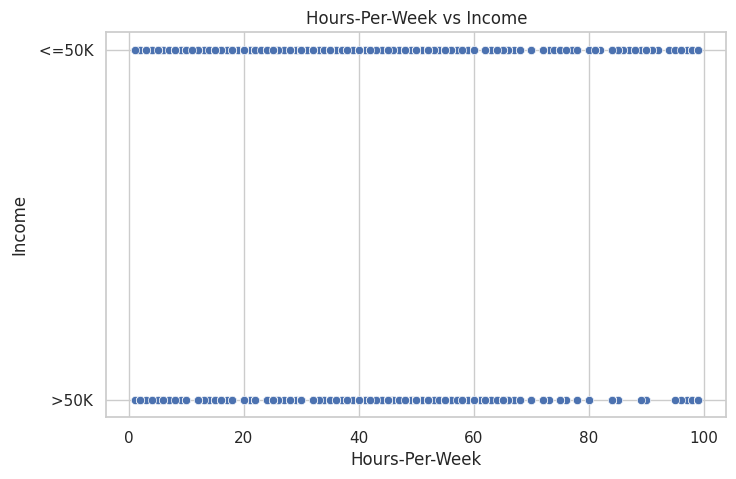

In [223]:
# Bivariate Analysis
# Scatter plot between numerical feature and target variable
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='Income', data=train_df)
    plt.title(f'{feature} vs Income')
    plt.show()

Correlation Matrix:

کورلیشن بین ویژگی‌های عددی را رسم میکنیم.

<ipython-input-224-6aaf27c32101>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


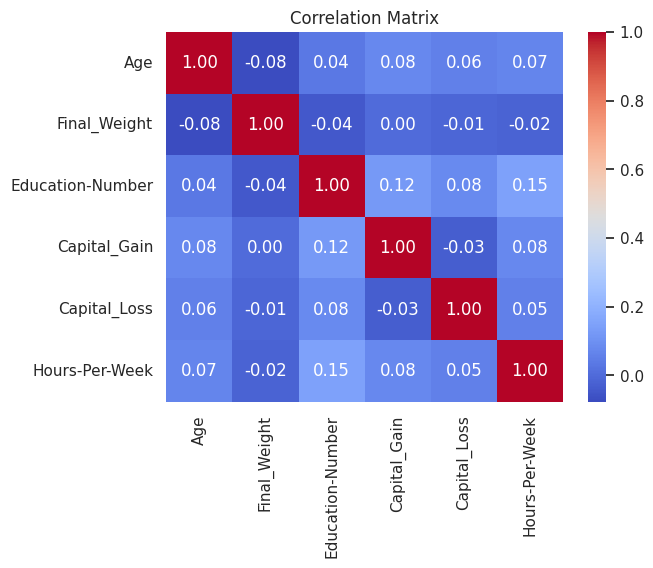

In [224]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Heat map on correlation:

این بار کورولیشن بین ویژگی‌های کتگوری را رسم میکنیم.

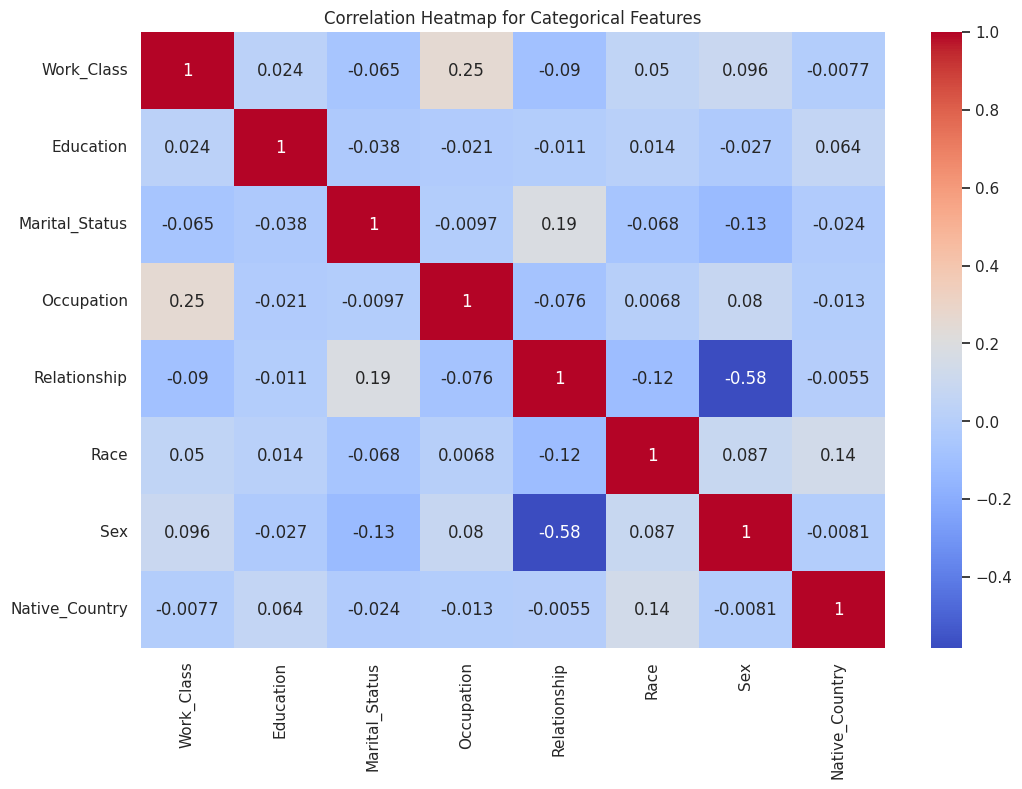

In [225]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[cat_features].apply(lambda x: x.astype('category').cat.codes).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Categorical Features')
plt.show()


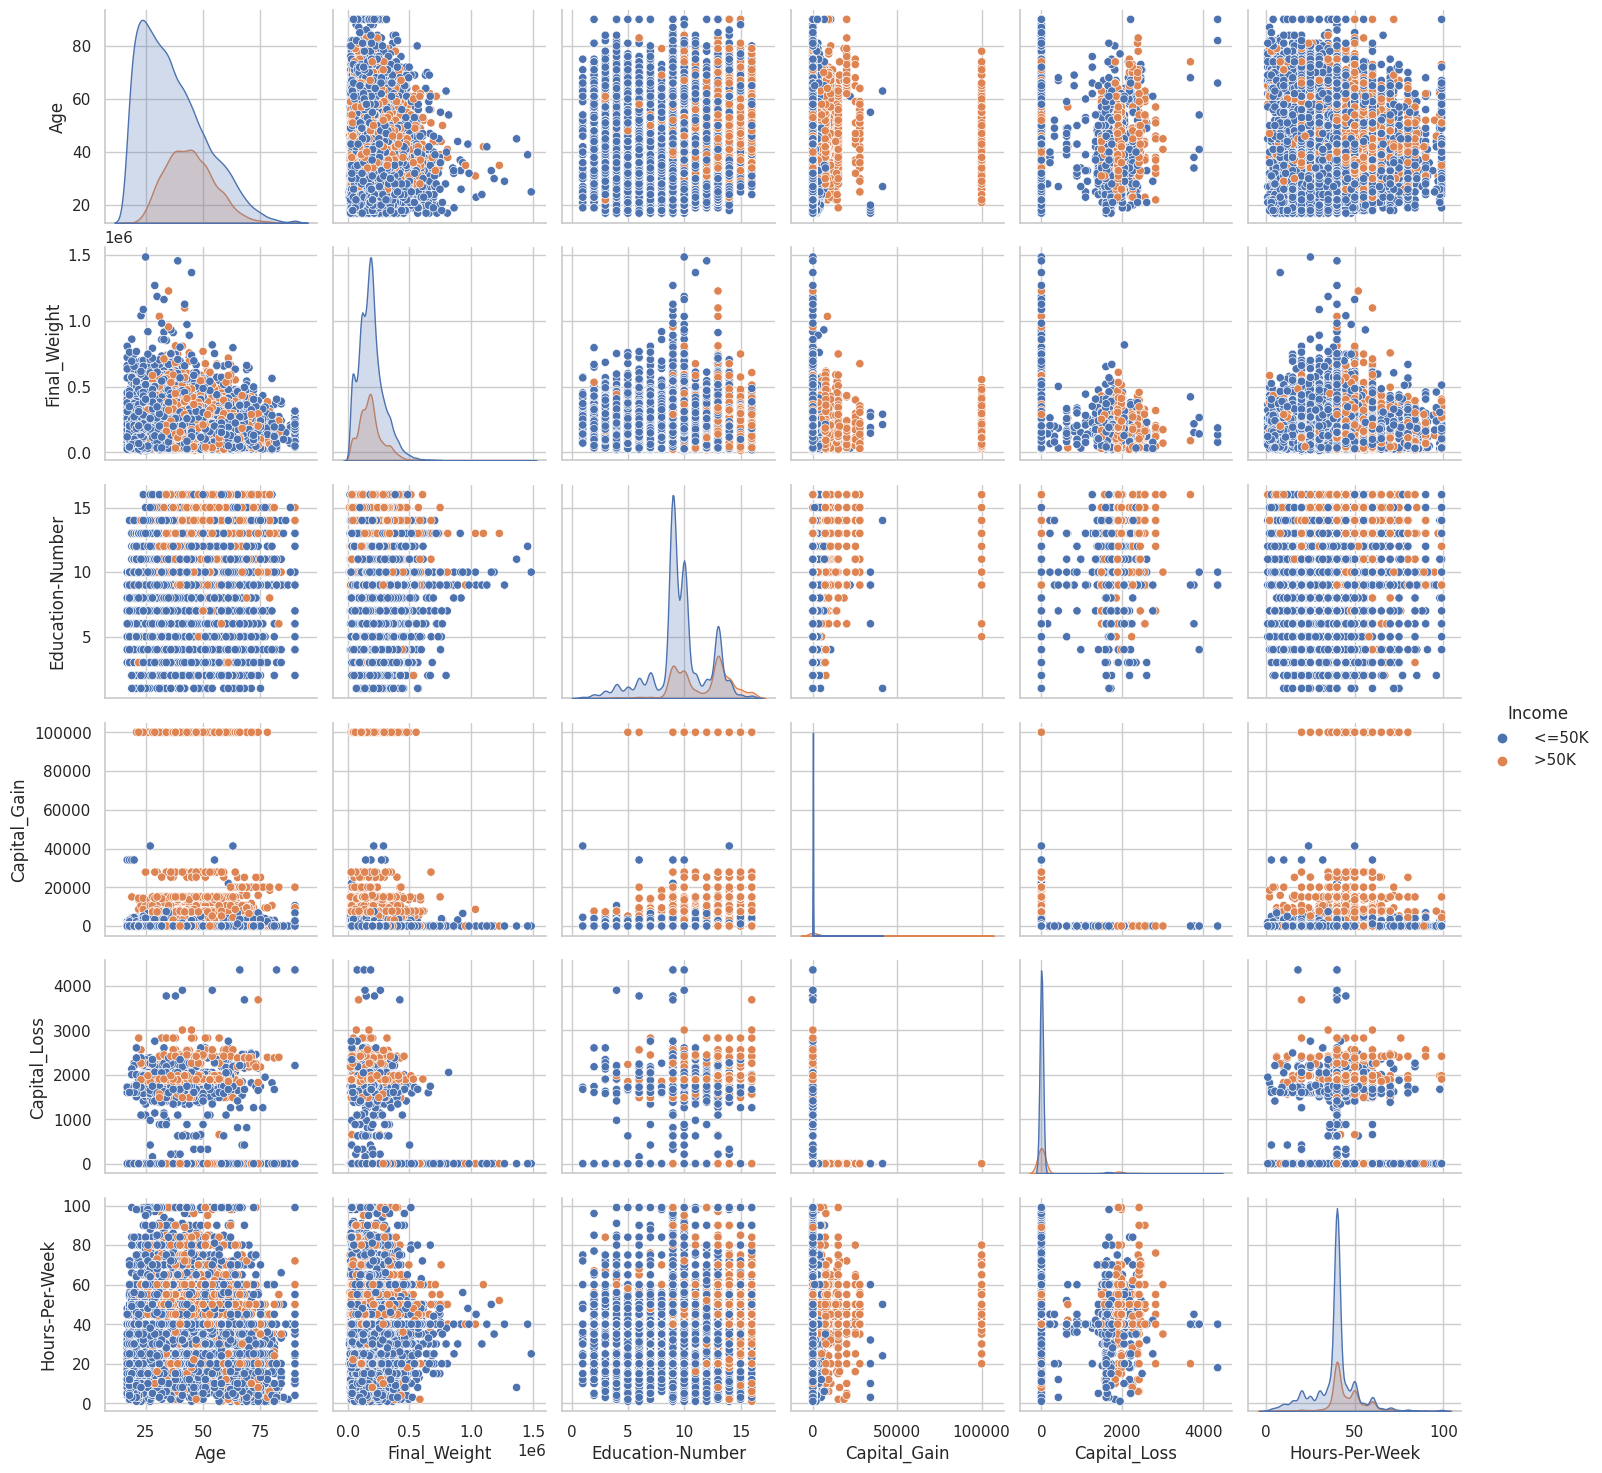

In [226]:
# Pair Plots
sns.pairplot(train_df, hue='Income', diag_kind='kde')
plt.show()

Box plots:

باکس پلات را برای درامد نسبت به کتگوری های مختلف رسم میکنیم.

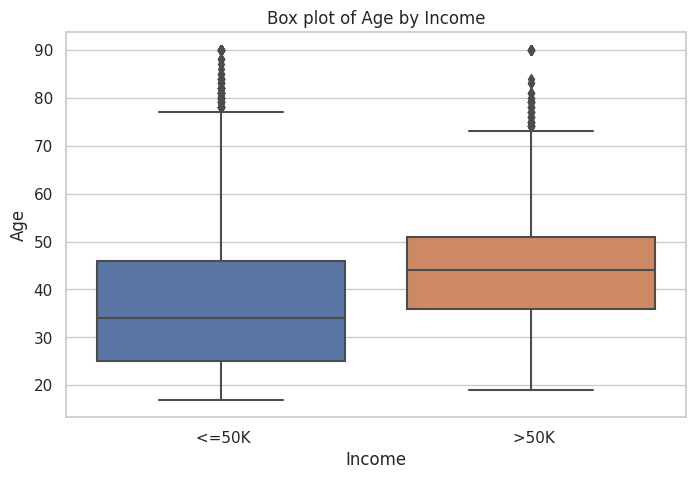

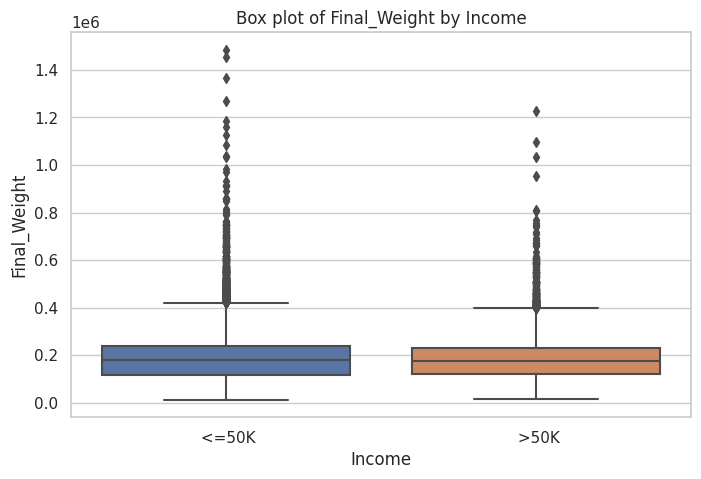

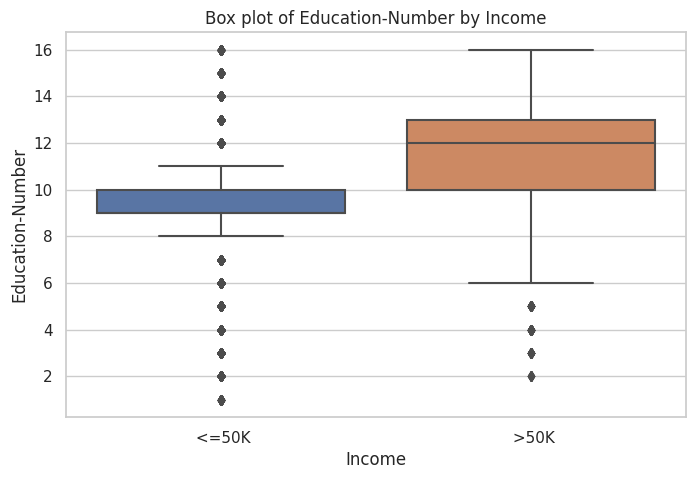

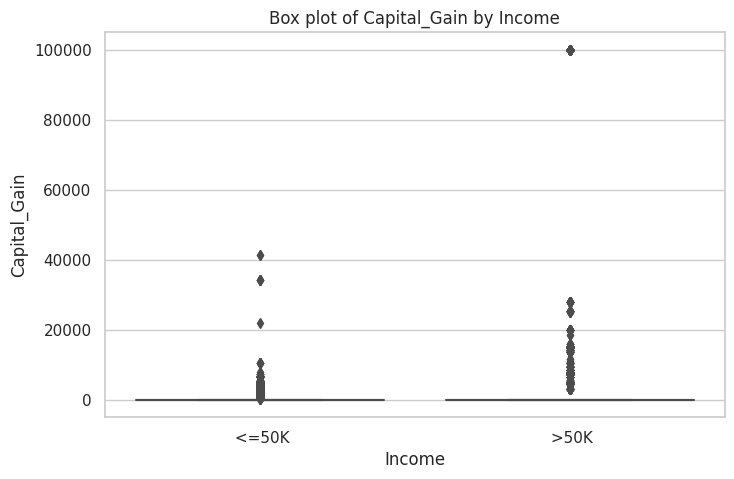

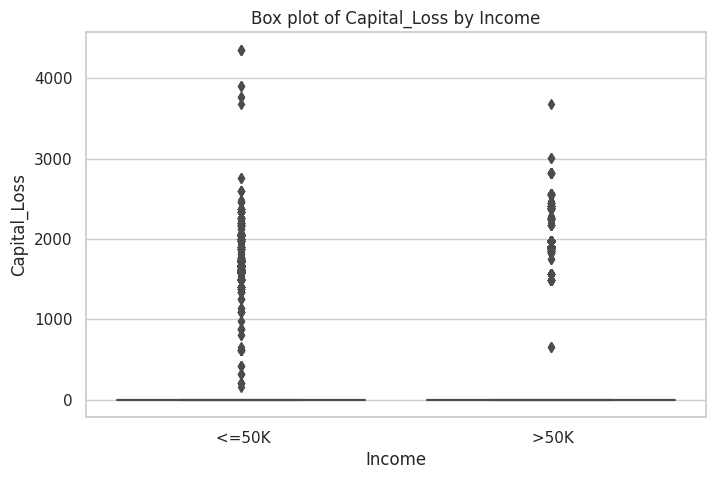

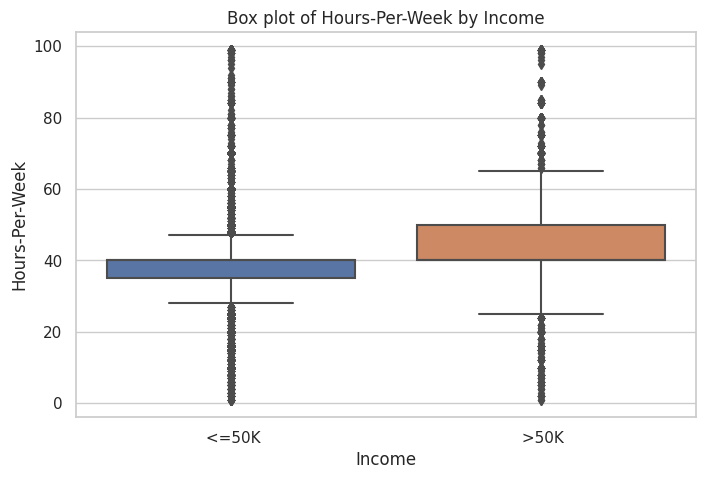

In [227]:
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Income', y=feature, data=train_df)
    plt.title(f'Box plot of {feature} by Income')
    plt.show()


Distribution by category:

توزیع ویژگی‌های عددی را برای هر گروه درامد رسم میکنیم.

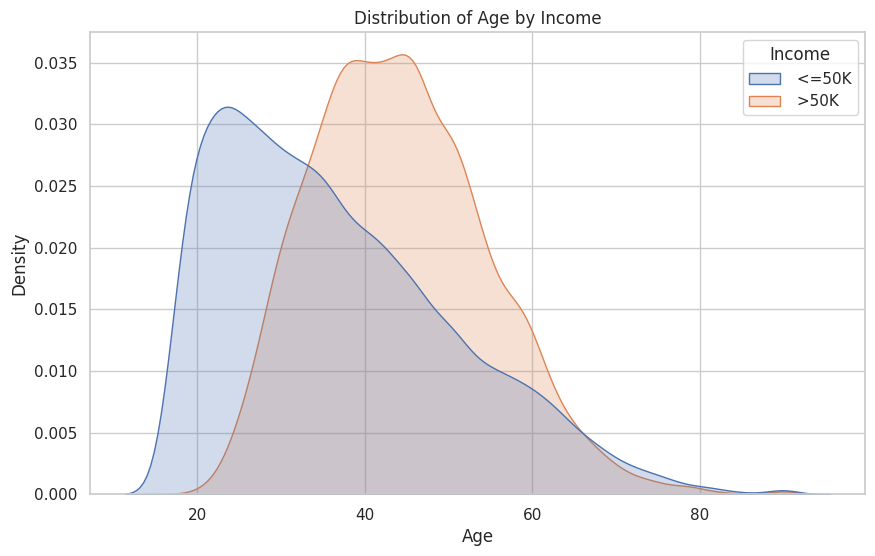

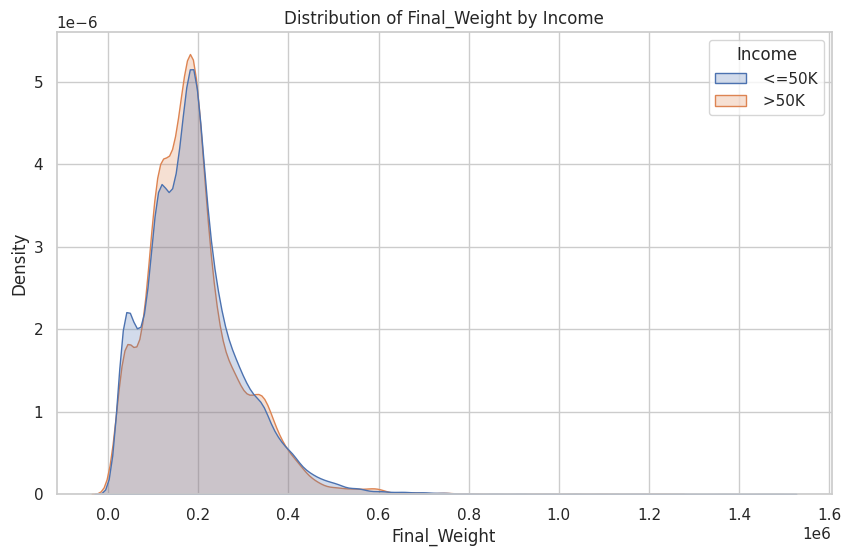

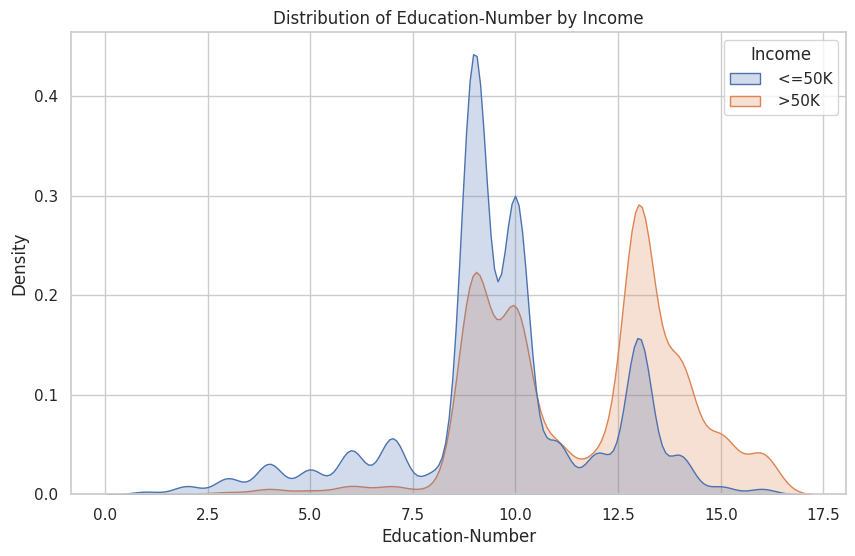

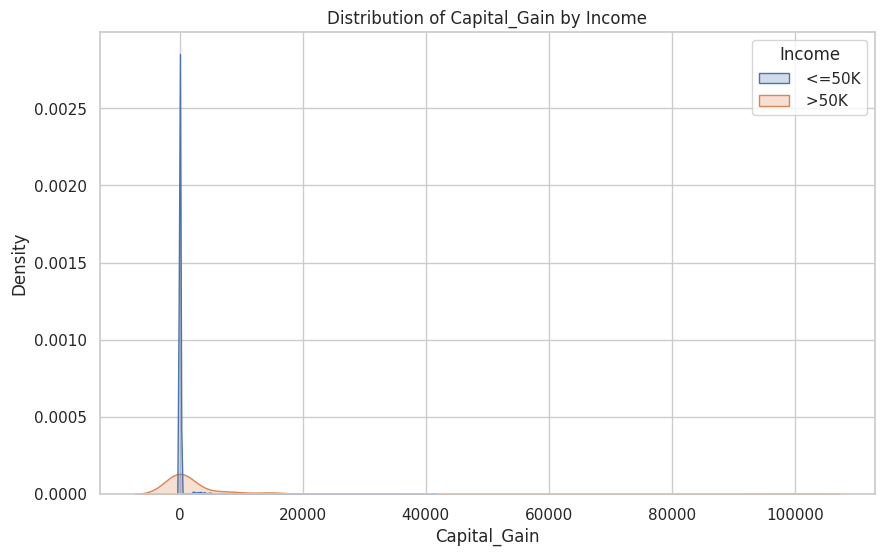

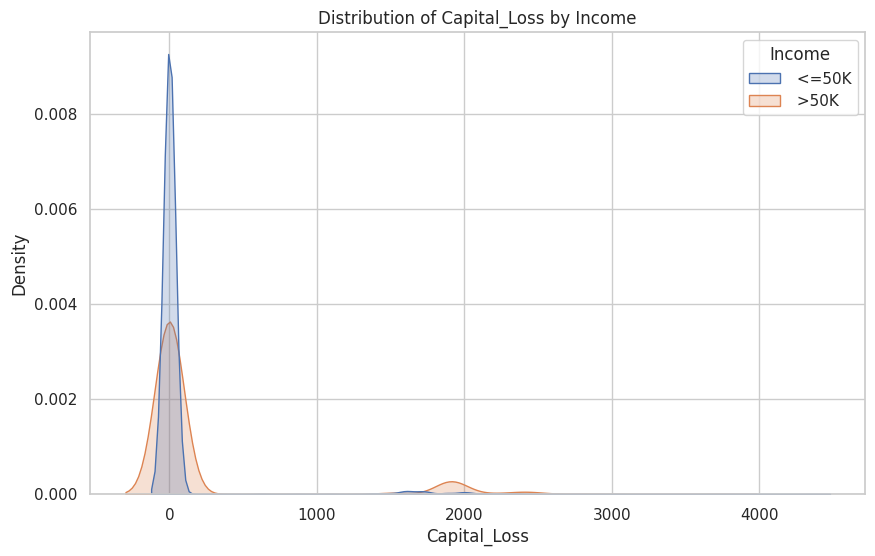

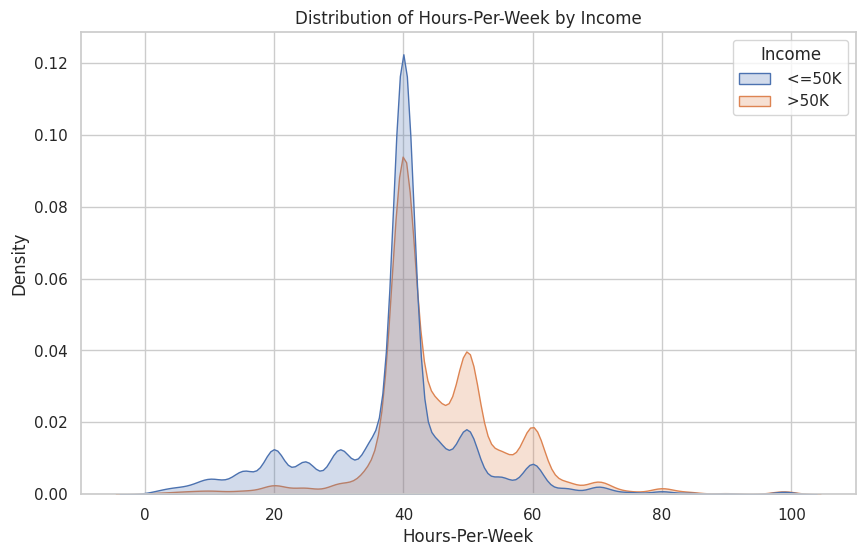

In [228]:
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=train_df, x=feature, hue='Income', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Income')
    plt.show()


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
پیش پردازش داده
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این بخش با روش های مختلف داده هارا پردازش کرده و تغییرات لازم را روی داده لحاظ کرده تا دقت نهایی افزایش یابد.
</p>
</div>

# **Managing missing values**

برای مدیریت مقادیر گمشده میتوان استراتژی‌های مختلفی به کار برد مثل حذف سطرهایی که دارای مقادیر گمشده هستند و یا قرار دادن میانه یا مد یا میانگین سایر ردیفها. در اینجا برای ویژگیهای عددی میانه و برای ویژگیهای کتگوری از مد استفاده شده است.

In [229]:
pattern = r'\?'

train_df.replace(pattern, np.nan, regex=True, inplace=True)
test_df.replace(pattern, np.nan, regex=True, inplace=True)

In [230]:
# Check for missing values in the train dataset
print("Missing Values in Train Dataset:")
print(train_df.isnull().sum())

# Handle missing values based on column types

# Numerical columns: Impute with the mean or median
numerical_columns = ['Age', 'Final_Weight', 'Education-Number', 'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week']
for column in numerical_columns:
    train_df[column].fillna(train_df[column].median(), inplace=True)

# Categorical columns: Impute with the mode (most frequent value)
categorical_columns = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']
for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)

# Verify that there are no missing values remaining
print("\nMissing Values After Imputation:")
print(train_df.isnull().sum())


Missing Values in Train Dataset:
Age                    0
Work_Class          1836
Final_Weight           0
Education              0
Education-Number       0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Sex                    0
Capital_Gain           0
Capital_Loss           0
Hours-Per-Week         0
Native_Country       583
Income                 0
dtype: int64

Missing Values After Imputation:
Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64


In [231]:
# Check for missing values in the test dataset
print("Missing Values in Train Dataset:")
print(test_df.isnull().sum())

# Handle missing values based on column types

# Numerical columns: Impute with the mean or median
numerical_columns = ['Age', 'Final_Weight', 'Education-Number', 'Capital_Gain', 'Capital_Loss', 'Hours-Per-Week']
for column in numerical_columns:
    test_df[column].fillna(train_df[column].median(), inplace=True)

# Categorical columns: Impute with the mode (most frequent value)
categorical_columns = ['Work_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']
for column in categorical_columns:
    test_df[column].fillna(train_df[column].mode()[0], inplace=True)

# Verify that there are no missing values remaining
print("\nMissing Values After Imputation:")
print(test_df.isnull().sum())

Missing Values in Train Dataset:
Age                   0
Work_Class          963
Final_Weight          0
Education             0
Education-Number      0
Marital_Status        0
Occupation          966
Relationship          0
Race                  0
Sex                   0
Capital_Gain          0
Capital_Loss          0
Hours-Per-Week        0
Native_Country      274
Income                0
dtype: int64

Missing Values After Imputation:
Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64


# **Drop duplicates**

بهتر است برای خروجی دقیق تر ردیف‌های تکراری حذف شوند.

In [232]:
# Drop duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# **Drop unnecessary columns**


با نگاهی کلی به داده میتوان فهمید که ارتباط یکایکی بین مقادیر ستون‌های Education و Education number وجود دارد. پس نیازی به هر دو این‌ها نیست. ستون Education را حذف میکنیم.

In [233]:
train_data = train_df.drop(['Education'], axis=1)
test_data = test_df.drop(['Education'], axis=1)


# **Feature engineering**

## **Combine Capital_Gain and Capital_Loss**

برای کاهش ابعاد Capital_gain و capital_loss را از هم کم میکنیم تا مقدار خالص را به دست بیاوریم

In [234]:
train_data['Net_Capital'] = train_data['Capital_Gain'] - train_data['Capital_Loss']
test_data['Net_Capital'] = test_data['Capital_Gain'] - test_data['Capital_Loss']

train_data = train_data.drop(columns=['Capital_Gain', 'Capital_Loss'])
test_data = test_data.drop(columns=['Capital_Gain', 'Capital_Loss'])
train_data

,Age,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native_Country,Income,Net_Capital
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


## **Age Binning**

برای دستیابی به رابطه‌های غیر خطی گروه‌های مختلف سنی را بر اساس سن تشکیل میدهیم و سپس سن را از ویژگی‌ها حذف میکنیم.


In [235]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '25-35', '35-45', '45-55', '55-65', '65+']

train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

train_data = train_data.drop(columns='Age')
test_data = test_data.drop(columns='Age')

train_data


,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Hours-Per-Week,Native_Country,Income,Net_Capital,Age_Group
0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2174,35-45
1,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,0,45-55
2,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,0,35-45
3,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,0,45-55
4,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0,25-35
32557,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0,35-45
32558,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0,55-65
32559,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0,0-25


## **Working Hours Per Week Binning**

مشابه بخش قبلی همین کار را برای ساعات کاری هفته انجام میدهیم.

In [236]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

train_data['Weekly_Hours_Group'] = pd.cut(train_data['Hours-Per-Week'], bins=bins, labels=labels, right=False)
test_data['Weekly_Hours_Group'] = pd.cut(test_data['Hours-Per-Week'], bins=bins, labels=labels, right=False)

train_data = train_data.drop(columns='Hours-Per-Week')
test_data = test_data.drop(columns='Hours-Per-Week')

train_data

,Work_Class,Final_Weight,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Native_Country,Income,Net_Capital,Age_Group,Weekly_Hours_Group
0,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,2174,35-45,40-60
1,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0,45-55,0-20
2,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0,35-45,40-60
3,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0,45-55,40-60
4,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0,25-35,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0,25-35,20-40
32557,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,0,35-45,40-60
32558,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0,55-65,40-60
32559,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0,0-25,20-40


## **Categorical feature encoding**
Label encoding و one-hot encoding دو روش مختلف برای تبدیل داده‌های دسته‌ای (categorical) به فرمت قابل پردازش توسط مدل‌های یادگیری ماشین هستند. در ادامه، این دو روش را با یکدیگر مقایسه میکنیم:

### Label Encoding:

1. **تعریف:**
   - در label encoding، هر دسته یا عنصر از یک ویژگی به یک عدد نظیر منسب می‌شود.
   - معمولاً اعداد به ترتیب صحیح اختصاص می‌یابند (مثل 0، 1، 2، ...).

2. **مناسب برای:**
   - ویژگی‌هایی که مقادیرشان دارای ارتباط ترتیبی هستند.

3. **نقاط قوت:**
   - کاهش ابعاد داده و حفظ اطلاعات مهم.
   - مخصوص ویژگی‌هایی که ترتیب معناداری دارند.

4. **نقاط ضعف:**
   - برای ویژگی‌هایی که ترتیب ندارند، اعداد ممکن است به اشتباه به مدل پیشتیبانی از ترتیب تصور شوند.

### One-Hot Encoding:

1. **تعریف:**
   - در one-hot encoding، برای هر دسته یک بردار با اندازه تعداد کل دسته‌ها ایجاد می‌شود.
   - تمام مقادیر بردار برابر با صفر هستند مگر در موقعیت متناظر با دسته‌ای که نمایانگر ویژگی است که مقدار یک دارد.

2. **مناسب برای:**
   - ویژگی‌هایی که ترتیب معناداری ندارند و یکسان ارزش‌محسوب می‌شوند.

3. **نقاط قوت:**
   - مناسب برای ویژگی‌هایی که ترتیب ندارند.
   - از افتراق در مدل‌هایی که ترتیب معناداری ندارند پیشگیری می‌کند.

4. **نقاط ضعف:**
   - افزایش ابعاد داده، به خصوص اگر تعداد دسته‌ها زیاد باشد.
   - اطلاعات مرتبط با ترتیب از بین می‌روند.

- اگر ویژگی‌های دسته‌ای ترتیب معناداری داشته باشند، label encoding مناسبتر است.
- اگر ویژگی‌ها ترتیب معناداری نداشته باشند، یا تعداد دسته‌ها کم باشد، one-hot encoding می‌تواند بهترین انتخاب باشد.
- برای مسائل پیش‌بینی، معمولاً one-hot encoding مورد استفاده قرار می‌گیرد.


در این مجموعه داده، مواردی که شکل ترتیبی داشتند به صورت برچسبی و بقیه موارد به صورت وانهات کدگذاری شده‌اند. برای ویژگی کشور چون مورد هلند در مجموعه داده تست وجود نداشت بهتر است از برچسبی استفاده کنیم.

In [237]:

# Columns for one-hot encoding
one_hot_columns = ['Work_Class', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex']

# Apply one-hot encoding to the selected columns in the training set
train_data = pd.get_dummies(train_data, columns=one_hot_columns)

# Apply one-hot encoding to the selected columns in the test set
test_data = pd.get_dummies(test_data, columns=one_hot_columns)


In [238]:
from sklearn.preprocessing import LabelEncoder

# Columns for label encoding
label_encode_columns_train = ['Income', 'Age_Group', 'Weekly_Hours_Group', 'Native_Country']

label_encoder = LabelEncoder()

# Apply label encoding to the selected columns in the training set
for column in label_encode_columns_train:
    train_data[column] = label_encoder.fit_transform(train_data[column])

label_encode_columns_test = ['Income','Age_Group', 'Weekly_Hours_Group' ,'Native_Country']

# Apply label encoding to the selected columns in the test set
for column in label_encode_columns_test:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [168]:
# Data Preprocessing
test_data.head()

,Final_Weight,Education-Number,Native_Country,Income,Net_Capital,Age_Group,Weekly_Hours_Group,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,226802,7,37,0,0,1,2,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,89814,9,37,0,0,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,336951,12,37,1,0,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,160323,10,37,1,7688,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,103497,10,37,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0


Normalization و Standardization دو روش هستند که برای تبدیل داده‌ها به یک مقیاس مشخص یا توزیع مشخص استفاده می‌شوند. این عملیات به بهبود عملکرد مدل‌های یادگیری ماشین کمک می‌کنند. دلایل اصلی انجام normalization و standardization عبارتند از:

### 1. مقیاس یکنواخت داده‌ها:

- **Normalization:**
  - در normalization، داده‌ها به یک بازه مشخص تبدیل می‌شوند، معمولاً بین 0 و 1 یا -1 و 1.
  - این باعث می‌شود که تمام ویژگی‌ها در یک مقیاس یکنواخت قرار گیرند و مدل بهتری از اطلاعات بهره‌مند شود.

- **Standardization:**
  - در standardization، داده‌ها به یک توزیع نرمال با میانگین صفر و واریانس یک تبدیل می‌شوند.
  - این باعث می‌شود که تمام ویژگی‌ها در یک مقیاس مشابه قرار گیرند و مدل بهبود عملکرد خود را نشان دهد.

### 2. پیشگیری از مشکلات عددی:

- **Normalization:**
  - ممکن است در الگوریتم‌هایی که به توان مبنا محاسبات می‌کنند (مانند رگرسیون لجستیک یا شبکه‌های عصبی)، مقادیر بزرگ ممکن است باعث مشکلات عددی شوند. با normalization، این مشکل کاهش می‌یابد.

- **Standardization:**
  - Standardization باعث می‌شود که مقادیر داده‌ها به واحد استاندارد (واحد اندازه‌گیری استاندارد) نزدیک شوند و از افزایش واحد واریانس جلوگیری کند.

### 3. بهبود همگرایی الگوریتم‌ها:

- **Normalization و Standardization:**
  - در بسیاری از الگوریتم‌های یادگیری ماشین، normalization و standardization باعث می‌شوند که الگوریتم‌ها به سرعت و بهبود بیشتری همگرایی یابند.

### 4. حفاظت از پایداری مدل:

- **Normalization و Standardization:**
  - مدل‌های یادگیری ماشین باید به حالتی برسند که تغییرات کوچک در ورودی تغییرات بسیار کمی در خروجی ایجاد کنند. این ویژگی توسط normalization و standardization تقویت می‌شود.

با انجام normalization و standardization، داده‌ها را آماده‌تر و قابلیت تفسیر بیشتری برای مدل‌های یادگیری ماشین می‌کنیم.

## **Normalization (Min-Max Scaling)**



In [240]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_columns = ['Final_Weight', 'Education-Number', 'Net_Capital']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected columns in the training set
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Apply normalization to the selected columns in the test set
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


## **Standardization (Z-score normalization)**



In [241]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Apply standardization to the selected columns in the training set
train_data[numerical_columns] = standard_scaler.fit_transform(train_data[numerical_columns])

# Apply standardization to the selected columns in the test set
test_data[numerical_columns] = standard_scaler.transform(test_data[numerical_columns])


In [242]:
train_data

,Final_Weight,Education-Number,Native_Country,Income,Net_Capital,Age_Group,Weekly_Hours_Group,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,-1.063569,1.134777,38,0,0.159605,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,-1.008668,1.134777,38,0,-0.133720,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.245040,-0.420679,38,0,-0.133720,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.425752,-1.198407,38,0,-0.133720,3,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1.408066,1.134777,4,0,-0.133720,1,2,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.639678,0.745913,38,0,-0.133720,1,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,-0.335436,-0.420679,38,1,-0.133720,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,-0.358779,-0.420679,38,0,-0.133720,4,2,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,0.110930,-0.420679,38,0,-0.133720,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [243]:
test_data

,Final_Weight,Education-Number,Native_Country,Income,Net_Capital,Age_Group,Weekly_Hours_Group,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,0.350729,-1.198407,37,0,-0.133720,1,2,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,-0.947061,-0.420679,37,0,-0.133720,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.394253,0.745913,37,1,-0.133720,1,2,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,-0.279076,-0.031815,37,1,0.903579,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.817431,-0.031815,37,0,-0.133720,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.242889,1.134777,37,0,-0.133720,2,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
16277,1.246955,-0.420679,37,0,-0.133720,4,2,0,0,0,...,0,0,0,0,0,1,0,0,0,1
16278,1.754558,1.134777,37,0,-0.133720,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
16279,-1.003174,1.134777,37,0,0.602292,2,2,0,0,0,...,1,0,0,0,1,0,0,0,0,1



---


<div dir="rtl">
<h2 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
آموزش مدل با روش های مختلف
</h2>
</div>
<div dir="rtl">
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
دﺭ ﺁﻣﻮﺯﺵ ﻫﺮ ﻣﺪﻝ ، ﺩﺭ ﺻﻮﺭﺕ ﺗﻨﻈﻴﻢ ﻫﺎﻳﭙﺮﭘﺎﺭﺍﻣﺘﺮﻫﺎﻱ ﻣﺪﻝ ﺩﺭ ﻛﺘﺎﺑﺨﺎﻧﻪ sklearn، ﺩﻻﻳﻞ ﺍﻳﻦ ﺍﻧﺘﺨﺎﺏ ﻫﺎ ﻭ ﺗﺤﻠﻴﻞ
ﺧﻮﺩﺗﺎﻥ ﺭﺍ ﺍﺯ ﻧﺘﺎﻳﺢ ﺣﺎﺻﻞ ﺷﺪﻩ، ﮔﺰﺍﺭﺵ ﺩﻫﻴﺪ.</p>
</div>


برای انجام آموزش مدل‌ها ابتدا کتابخانه مربوطه را ایمپورت کرده و ان را روی داده‌های آموزشی آموزش میدهیم.
سپس مدل را روی داده‌های تست پیش میبریم و بر اساس خروجی‌ها، معیارهای ارزیابی خواسته شده را ارائه میدهیم

# **Train**

In [244]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Separate features (X) and target variable (y)
X_train = train_data.drop('Income', axis=1)
y_train = train_data['Income']
X_test = test_data.drop('Income', axis=1)
y_test = test_data['Income']

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Support Vector Machine
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Support Vector Machine آموزش دهید.
</p>
</div>

kernel='linear': این پارامتر نوع هسته مورد استفاده برای SVM را مشخص می کند. در این مورد، ما از یک هسته خطی استفاده می کنیم.. SVM ها می توانند از انواع مختلفی از هسته ها (به عنوان مثال، خطی، چند جمله ای، تابع پایه شعاعی (RBF) و غیره) برای نگاشت داده های ورودی در فضایی با ابعاد بالاتر استفاده کنند. انتخاب هسته به ماهیت داده ها و مشکل موجود بستگی دارد. معمولاً زمانی که داده ها به صورت خطی قابل تفکیک هستند از هسته خطی استفاده می شود.

random_state=42: این پارامتر برای تنظیم دانه تصادفی برای تکرارپذیری استفاده می شود. هنگامی که یک دانه تصادفی تنظیم می کنیم، تضمین می کند که اگر یک کد را چندین بار اجرا کنید، نتایج یکسانی خواهید داشت. انتخاب عدد خاص (در این مورد 42) دلخواه است.  می توان از هر عدد صحیح استفاده کرد.

In [245]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [246]:
# Make predictions on the test set
svm_pred = svm_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, svm_pred)
accuracy = accuracy_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred)
recall = recall_score(y_test, svm_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

Confusion Matrix:
[[11593   837]
 [ 1645  2201]]

Accuracy: 0.8475055296141558
Precision: 0.7244897959183674
Recall: 0.5722828913156526
F1 Score: 0.6394538059267867

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12430
           1       0.72      0.57      0.64      3846

    accuracy                           0.85     16276
   macro avg       0.80      0.75      0.77     16276
weighted avg       0.84      0.85      0.84     16276



<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
K-Nearest Neighbors</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از KNeighborsClassifier آموزش دهید.
</p>
</div>

### **K = 3**

In [247]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN model
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_model_3.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=3)

In [248]:
# K = 3
# Make predictions on the test set
knn3_pred = knn_model_3.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, knn3_pred)
accuracy = accuracy_score(y_test, knn3_pred)
f1 = f1_score(y_test, knn3_pred)
precision = precision_score(y_test, knn3_pred)
recall = recall_score(y_test, knn3_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn3_pred))

Confusion Matrix:
[[11186  1244]
 [ 1647  2199]]

Accuracy: 0.8223765052838535
Precision: 0.6386871914028464
Recall: 0.5717628705148206
F1 Score: 0.6033749485526135

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     12430
           1       0.64      0.57      0.60      3846

    accuracy                           0.82     16276
   macro avg       0.76      0.74      0.74     16276
weighted avg       0.82      0.82      0.82     16276



<div style="border-top: 1px dashed #999;"></div>

### **K = 5**

In [250]:
# Train KNN model
knn_model_5 = KNeighborsClassifier(n_neighbors=5)
knn_model_5.fit(X_train, y_train)


KNeighborsClassifier()

In [251]:
# K = 5
# Make predictions on the test set
knn5_pred = knn_model_5.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, knn5_pred)
accuracy = accuracy_score(y_test, knn5_pred)
f1 = f1_score(y_test, knn5_pred)
precision = precision_score(y_test, knn5_pred)
recall = recall_score(y_test, knn5_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn5_pred))

Confusion Matrix:
[[11273  1157]
 [ 1682  2164]]

Accuracy: 0.8255713934627673
Precision: 0.65161096055405
Recall: 0.5626625065002601
F1 Score: 0.6038788893539835

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12430
           1       0.65      0.56      0.60      3846

    accuracy                           0.83     16276
   macro avg       0.76      0.73      0.75     16276
weighted avg       0.82      0.83      0.82     16276



### **K = 7**

In [264]:
# Train KNN model
knn_model_7 = KNeighborsClassifier(n_neighbors=7)
knn_model_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [265]:
# K = 7
# Make predictions on the test set
knn7_pred = knn_model_7.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, knn7_pred)
accuracy = accuracy_score(y_test, knn7_pred)
f1 = f1_score(y_test, knn7_pred)
precision = precision_score(y_test, knn7_pred)
recall = recall_score(y_test, knn7_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, knn7_pred))

Confusion Matrix:
[[11380  1050]
 [ 1635  2211]]

Accuracy: 0.8350331776849349
Precision: 0.6780128794848206
Recall: 0.5748829953198128
F1 Score: 0.6222034613761082

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     12430
           1       0.68      0.57      0.62      3846

    accuracy                           0.84     16276
   macro avg       0.78      0.75      0.76     16276
weighted avg       0.83      0.84      0.83     16276



<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Naive Bayes
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از Naive Bayes آموزش دهید.
</p>
</div>

In [257]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [258]:
# Make predictions on the test set
nb_pred = nb_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, nb_pred)
accuracy = accuracy_score(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred)
precision = precision_score(y_test, nb_pred)
recall = recall_score(y_test, nb_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

Confusion Matrix:
[[7276 5154]
 [ 324 3522]]

Accuracy: 0.6634308183828951
Precision: 0.40594744121715076
Recall: 0.9157566302652106
F1 Score: 0.5625299472927647

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     12430
           1       0.41      0.92      0.56      3846

    accuracy                           0.66     16276
   macro avg       0.68      0.75      0.64     16276
weighted avg       0.83      0.66      0.69     16276



<div style="border-top: 1px dashed #999;"></div>

<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:times new roman;color:white">
Random Forest
</h3>
</div>
<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
در این قسمت مدل خود را با استفاده از RandomForestClassifier آموزش دهید.
</p>
</div>

In [259]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [260]:
# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, rf_pred)
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


Confusion Matrix:
[[11354  1076]
 [ 1513  2333]]

Accuracy: 0.8409314327844679
Precision: 0.6843649163977706
Recall: 0.6066042641705668
F1 Score: 0.6431426602343211

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12430
           1       0.68      0.61      0.64      3846

    accuracy                           0.84     16276
   macro avg       0.78      0.76      0.77     16276
weighted avg       0.84      0.84      0.84     16276




---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">
مقایسه مدل ها</h3>
</div>

<div dir="rtl">
<p align=right style="font-size: 16;line-height:100%;font-family:vazir;color:white">

ﺩﺭ ﻧﻬﺎﻳﺖ ﺑﻌﺪ ﺍﺯ ﺁﻣﻮﺯﺵ ﻣﺪﻝ ﻫﺎ، ﺑﺮﺍﻱ ﺍﺭﺯﻳﺎﺑﻲ ﻋﻤﻠﻜﺮﺩ ﻣﺪﻝ ﻫﺎ، ﺍﺯ ﻣﺠﻤﻮﻋﻪ ﺩﺍﺩﻩ
<code> Adult_TestDataset </code>
ﺍﺳﺘﻔﺎﺩﻩ ﻧﻤﺎﻳﻴﺪ ﻭ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ
<code> (confusion matrix) </code>
ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ
<code> recall  </code>,
<code> precision  </code>,
<code> accuracy  </code>,
<code> f1-score    </code>
 ، ﺑﻪ ﺗﺤﻠﻴﻞ ﻧﺘﺎﻳﺞ ﺑﺪﺳﺖ ﺁﻣﺪﻩ ﺑﭙﺮﺩﺍﺯﻳﺪ. ﺗﻮﺟﻪ ﺩﺍﺷﺘﻪ ﺑﺎﺷﻴﺪ ﻛﻪ ﺑﺮﺍﻱ ﺳﺎﺩﮔﻲ ﻛﺎﺭ، ﻣﻲ ﺗﻮﺍﻧﻴﺪ ﺑﺎ ﺍﺳﺘﻔﺎﺩﻩ ﺍﺯ ﺗﻮﺍﺑﻊ ﺁﻣﺎﺩﻩsklearn  ، ﻣﺎﺗﺮﻳﺲ ﺩﺭﻫﻢ ﺭﻳﺨﺘﮕﻲ ﻭ ﻣﻌﻴﺎﺭﻫﺎﻱ ﺍﺭﺯﻳﺎﺑﻲ ﺭﺍ ﺑﺪﺳﺖ ﺁﻭﺭﻳﺪ.

</p>
</div>

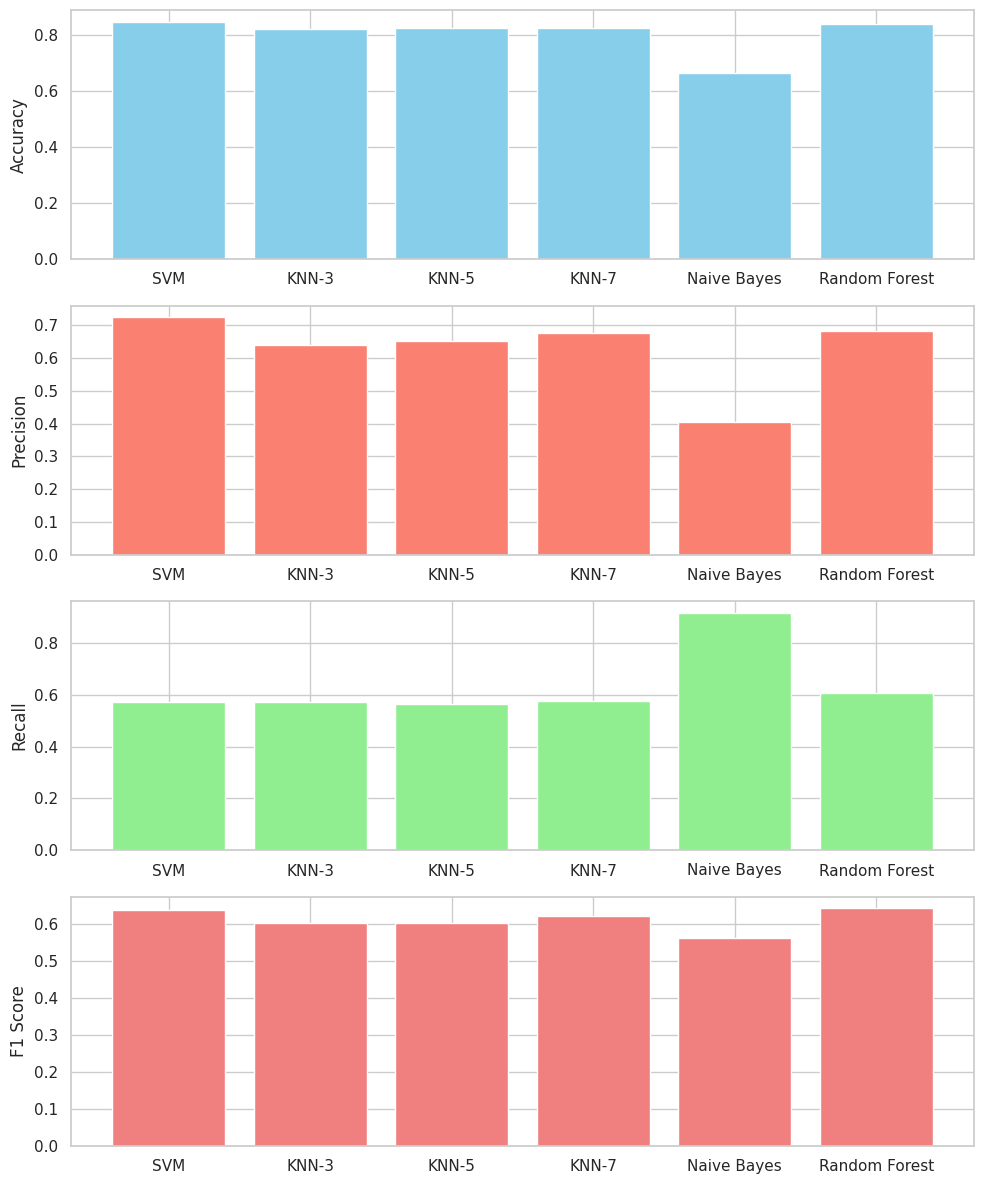

In [266]:
#comparing all models
# Evaluate models
models = ['SVM', 'KNN-3','KNN-5','KNN-7', 'Naive Bayes', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, knn3_pred),accuracy_score(y_test, knn5_pred),accuracy_score(y_test, knn5_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, rf_pred)]
precision_scores = [precision_score(y_test, svm_pred), precision_score(y_test, knn3_pred), precision_score(y_test, knn5_pred), precision_score(y_test, knn7_pred), precision_score(y_test, nb_pred), precision_score(y_test, rf_pred)]
recall_scores = [recall_score(y_test, svm_pred), recall_score(y_test, knn3_pred),recall_score(y_test, knn5_pred),recall_score(y_test, knn7_pred) ,recall_score(y_test, nb_pred), recall_score(y_test, rf_pred)]
f1_scores = [f1_score(y_test, svm_pred), f1_score(y_test, knn3_pred),f1_score(y_test, knn5_pred),f1_score(y_test, knn7_pred), f1_score(y_test, nb_pred), f1_score(y_test, rf_pred)]

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

ax1.bar(models, accuracy_scores, color='skyblue')
ax1.set_ylabel('Accuracy')

ax2.bar(models, precision_scores, color='salmon')
ax2.set_ylabel('Precision')

ax3.bar(models, recall_scores, color='lightgreen')
ax3.set_ylabel('Recall')

ax4.bar(models, f1_scores, color='lightcoral')
ax4.set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما
</p>

In [267]:
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

model_metrics = {
    "SVM":np.array([accuracy_scores[0],precision_scores[0],recall_scores[0],f1_scores[0]]),
    "KNN (k=3)":np.array([accuracy_scores[1],precision_scores[1],recall_scores[1],f1_scores[1]]),
    "KNN (k=5)":np.array([accuracy_scores[2],precision_scores[2],recall_scores[2],f1_scores[2]]),
    "KNN (k=7)":np.array([accuracy_scores[3],precision_scores[3],recall_scores[3],f1_scores[3]]),
    "Naive Bayes":np.array([accuracy_scores[4],precision_scores[4],recall_scores[4],f1_scores[4]]),
    "Random Forest":np.array([accuracy_scores[5],precision_scores[5],recall_scores[5],f1_scores[5]])
}

best_model_by_metric = {metric: "" for metric in metric_names}

for metric in metric_names:
    best_score = -1
    best_model = ""
    for model, metrics in model_metrics.items():
        score = metrics[metric_names.index(metric)]
        if score > best_score:
            best_score = score
            best_model = model
    best_model_by_metric[metric] = best_model
    print(f"For {metric}, the best model is: {best_model}")

model_counts = {model: 0 for model in model_metrics.keys()}
for metric in metric_names:
    best_model = best_model_by_metric[metric]
    model_counts[best_model] += 1

best_overall_model = max(model_counts, key=model_counts.get)

print(f"\nThe model with the best metrics in the majority of categories is: {best_overall_model}")

For Accuracy, the best model is: SVM
For Precision, the best model is: SVM
For Recall, the best model is: Naive Bayes
For F1 Score, the best model is: Random Forest

The model with the best metrics in the majority of categories is: SVM


SVM به طور کلی خروجی های بهتری کسب کرده است اما همانطور که دیده میشود آموزش آن نیز به شدت زمانبر است نسبت به سایرین
همچنین مدل بیز نیز برتری فاحشی در یاداوری نشان میدهد پس به طور کلی برای مواردی که میخواهیم مثبت‌ها با اطمینان زیاد مثبت باشند و اهمیت زیادی به منفی‌های کاذب ندهیم مدل بسیار مناسبی است.
همچنین در knn تفاوت زیادی با تغییر تعداد همسایه‌ها مشاهده نشد.!!!!


---


<div dir="rtl">
<h3 align=right style="font-size: 16;line-height:100%;font-family:vazir;color:green">
بخش امتیازی
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
هر روش دیگری برای آموزش مدل را میتوانید در این بخش پیاده سازی نمایید ، اما لازمه آن فهم کامل آن روش هست پس در صورتی که روش دیگری را نیز پیاده سازی کردید فهم خود را از نتایج بدست آمده و خود روش بنویسید.
</p>

</div>



الگوریتم Gradient Boosting به صورت ترتیبی (sequential) کار می‌کند و به صورت مرحله به مرحله مدل‌های ضعیف (weak learners) را ایجاد و به مدل نهایی اضافه می‌کند. این الگوریتم به عنوان یک الگوریتم موارد مشترک یادگیری انزوا (ensemble learning) شناخته می‌شود. در ادامه، مراحل کار الگوریتم Gradient Boosting را بیشتر توضیح می‌دهیم:

### 1. ایجاد مدل اولیه:

- ابتدا یک مدل ضعیف (معمولاً درخت تصمیم کوتاه) ایجاد می‌شود.
- این مدل اولیه ممکن است به علت سادگی خود دقت پایینی داشته باشد.

### 2. محاسبه خطا:

- خطای مدل اولیه محاسبه می‌شود. این خطا معمولاً به وسیله تابع هزینه (cost function) اندازه‌گیری می‌شود.
- خطا به عنوان مقدار اصلاحی برای بهبود مدل استفاده می‌شود.

### 3. ایجاد مدل تصحیح‌کننده:

- یک مدل تصحیح‌کننده جدید ایجاد می‌شود تا سعی کند خطاهای مدل قبلی را تصحیح کند.
- این مدل تصحیح‌کننده به توجه به خطاهای مدل قبلی طراحی می‌شود تا در جهتی که مدل قبلی خطا داشته است، بهبود ایجاد کند.

### 4. ترکیب مدل‌ها:

- مدل تصحیح‌کننده با مدل اولیه ترکیب می‌شود.
- این ترکیب به صورت مجموع یا با وزن‌دهی به مدل اولیه اضافه می‌شود.

### 5. بهبود مدل نهایی:

- مدل نهایی با اضافه کردن مدل تصحیح‌کننده به مدل اولیه بهبود می‌یابد.
- این مراحل به صورت تکراری ادامه پیدا می‌کنند. هر مرحله یک مدل تصحیح‌کننده ایجاد می‌شود و به مدل نهایی اضافه می‌شود.

### 6. توقف الگوریتم:

- تعداد تکرارها یا شرایط دیگری ممکن است تعیین کننده باشد که الگوریتم کی متوقف شود.

### 7. پیش‌بینی نهایی:

- پیش‌بینی نهایی توسط ترکیب تمام مدل‌های ایجاد شده انجام می‌شود.

Gradient Boosting یک رویکرد قدرتمند در یادگیری ماشین است که از مزایای مقاومت در برابر بیش‌برازش و عملکرد خوب در مسائل مختلف بهره‌مند است. با افزایش تعداد مدل‌ها و تنظیم پارامترهای الگوریتم، می‌توان به دقت و کارایی بالاتری دست پیدا کرد.

پارامترهای اصلی:
n_estimators:

تعداد مدل‌های ضعیف که باید ترکیب شوند.
افزایش این مقدار ممکن است باعث افزایش دقت شود، اما نیاز به منابع بیشتر نیز دارد.
learning_rate:

نرخ یادگیری که تعیین می‌کند که مقدار خطای هر مدل چقدر بر روی مدل نهایی تاثیر بگذارد.
افزایش این مقدار ممکن است باعث افزایش دقت شود، اما با توجه به آن که این مقدار در مقابل n_estimators کنترل شود.
max_depth:

عمق حداکثر درخت‌های تصمیم که به عنوان مدل ضعیف استفاده می‌شوند.
افزایش این مقدار ممکن است باعث افزایش پیچیدگی مدل و افزایش دقت شود، اما باید از بیش‌برازش (overfitting) مراقبه شود.
مزایا:
مقاومت در برابر بیش‌برازش.
قابلیت کار با داده‌های مختلف (عدم وجود پیش‌فرض برای توزیع داده).
محدودیت‌ها:
نیاز به تنظیم پارامترها برای جلوگیری از بیش‌برازش.
زمان آموزش ممکن است بیشتر از الگوریتم‌های دیگر باشد.


In [269]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)


# Make predictions on the test set
gb_pred = rf_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, gb_pred)
accuracy = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
recall = recall_score(y_test, gb_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))


Confusion Matrix:
[[11354  1076]
 [ 1513  2333]]

Accuracy: 0.8409314327844679
Precision: 0.6843649163977706
Recall: 0.6066042641705668
F1 Score: 0.6431426602343211

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12430
           1       0.68      0.61      0.64      3846

    accuracy                           0.84     16276
   macro avg       0.78      0.76      0.77     16276
weighted avg       0.84      0.84      0.84     16276



<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    تحیل شما از مدل امتیازی
</p>

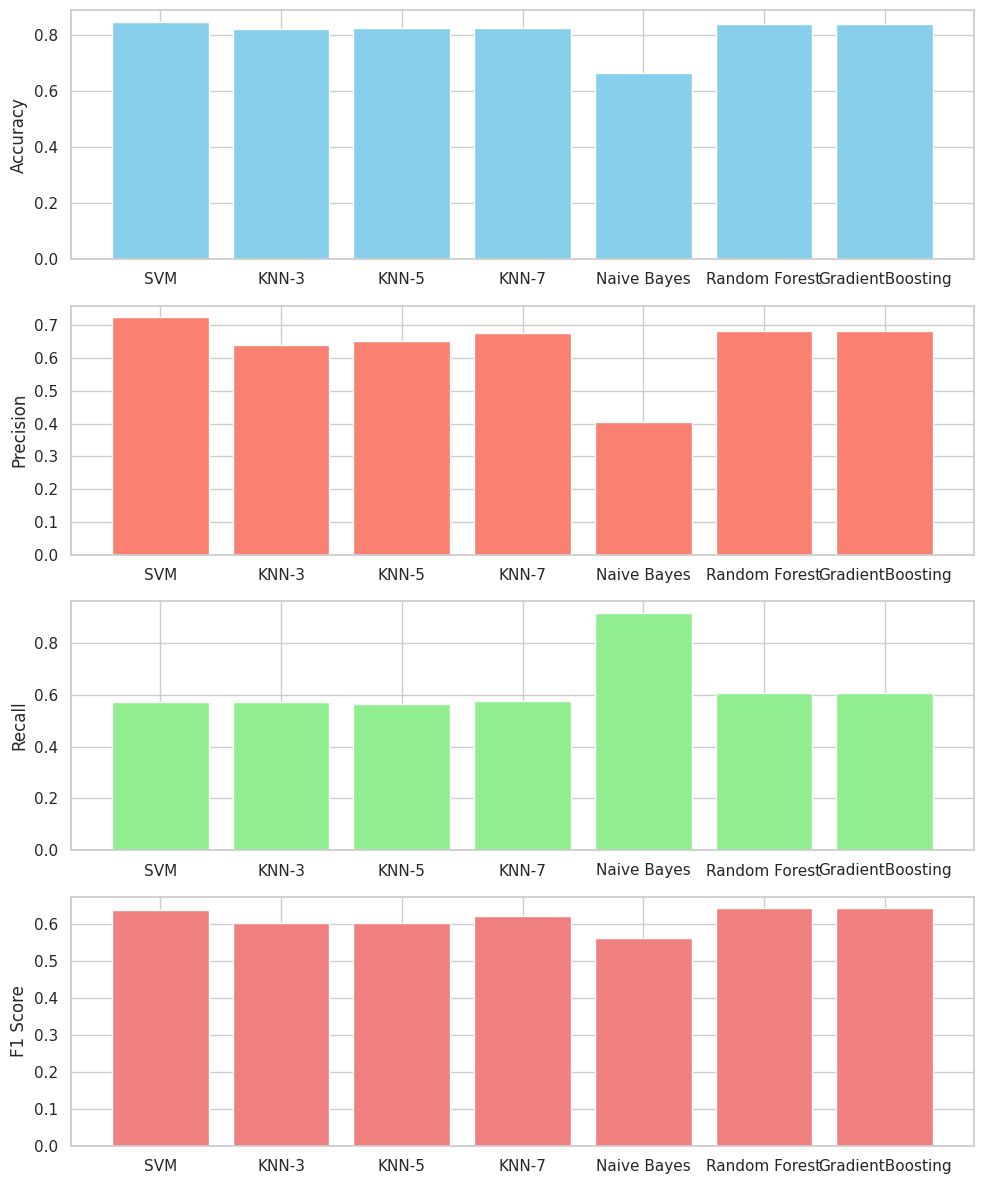

In [270]:
#comparing all models
# Evaluate models
models = ['SVM', 'KNN-3','KNN-5','KNN-7', 'Naive Bayes', 'Random Forest','GradientBoosting']
accuracy_scores = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, knn3_pred),accuracy_score(y_test, knn5_pred),accuracy_score(y_test, knn5_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, gb_pred)]
precision_scores = [precision_score(y_test, svm_pred), precision_score(y_test, knn3_pred), precision_score(y_test, knn5_pred), precision_score(y_test, knn7_pred), precision_score(y_test, nb_pred), precision_score(y_test, rf_pred), precision_score(y_test, gb_pred)]
recall_scores = [recall_score(y_test, svm_pred), recall_score(y_test, knn3_pred),recall_score(y_test, knn5_pred),recall_score(y_test, knn7_pred) ,recall_score(y_test, nb_pred), recall_score(y_test, rf_pred), recall_score(y_test, gb_pred)]
f1_scores = [f1_score(y_test, svm_pred), f1_score(y_test, knn3_pred),f1_score(y_test, knn5_pred),f1_score(y_test, knn7_pred), f1_score(y_test, nb_pred), f1_score(y_test, rf_pred), f1_score(y_test, gb_pred)]

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

ax1.bar(models, accuracy_scores, color='skyblue')
ax1.set_ylabel('Accuracy')

ax2.bar(models, precision_scores, color='salmon')
ax2.set_ylabel('Precision')

ax3.bar(models, recall_scores, color='lightgreen')
ax3.set_ylabel('Recall')

ax4.bar(models, f1_scores, color='lightcoral')
ax4.set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [271]:
metric_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

model_metrics = {
    "SVM":np.array([accuracy_scores[0],precision_scores[0],recall_scores[0],f1_scores[0]]),
    "KNN (k=3)":np.array([accuracy_scores[1],precision_scores[1],recall_scores[1],f1_scores[1]]),
    "KNN (k=5)":np.array([accuracy_scores[2],precision_scores[2],recall_scores[2],f1_scores[2]]),
    "KNN (k=7)":np.array([accuracy_scores[3],precision_scores[3],recall_scores[3],f1_scores[3]]),
    "Naive Bayes":np.array([accuracy_scores[4],precision_scores[4],recall_scores[4],f1_scores[4]]),
    "Random Forest":np.array([accuracy_scores[5],precision_scores[5],recall_scores[5],f1_scores[5]]),
    "GradientBoostingClassifier":np.array([accuracy_scores[6],precision_scores[6],recall_scores[6],f1_scores[6]])
}

best_model_by_metric = {metric: "" for metric in metric_names}

for metric in metric_names:
    best_score = -1
    best_model = ""
    for model, metrics in model_metrics.items():
        score = metrics[metric_names.index(metric)]
        if score > best_score:
            best_score = score
            best_model = model
    best_model_by_metric[metric] = best_model
    print(f"For {metric}, the best model is: {best_model}")

model_counts = {model: 0 for model in model_metrics.keys()}
for metric in metric_names:
    best_model = best_model_by_metric[metric]
    model_counts[best_model] += 1

best_overall_model = max(model_counts, key=model_counts.get)

print(f"\nThe model with the best metrics in the majority of categories is: {best_overall_model}")

For Accuracy, the best model is: SVM
For Precision, the best model is: SVM
For Recall, the best model is: Naive Bayes
For F1 Score, the best model is: Random Forest

The model with the best metrics in the majority of categories is: SVM


عملکرد این مدل با انتظارات من تطابق داشت به این صورت که انتظار میرفت شباهت زیادی با جنگل تصادفی به خاطر ذات درختی خود داشته باشد.